In [3]:
# !pip3 install pygmo

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import src.mo as mo

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


### Coisas a fazer
#### Comparar métodos

* ~~calcular hipervolume~~
* colocar duas curvas de pareto no mesmo gráfico
* ~~contar pontos não dominados~~
* criar curva de pareto a partir de pontos
* ~~cores diferentes para otimo/factivel~~

In [6]:
def clean_sol_csv_file(filepath):
    df = pd.read_csv(filepath)
    df['status'] = [a.split('.')[1] for a in df.status.values]
    
    return df

filepath = "../project/resultados/exp_20220927/A-n50-m4-Q80-v4-s100-d1_1_1_1_sol_20220927135621.csv"
df = clean_sol_csv_file(filepath)

In [11]:
def read_out_file(filepath):
    skiprows = 0
    param_map = {}
    
    with open(filepath) as file:
        for line in file:
            if ':' in line:
                key, value = line.split(':')
                param_map[key.strip()] = value.strip()
            
            if ';' in line:
                break
            
            skiprows += 1
                
    df = pd.read_csv(filepath, sep=';', skiprows=skiprows)
    df.columns = [col.strip() for col in df.columns]

    df['f_1'] = -df['f_1']
    df = df[['f_0', 'f_1']]

    df.columns = ['dist', 'demand']
        
    return (df, param_map)

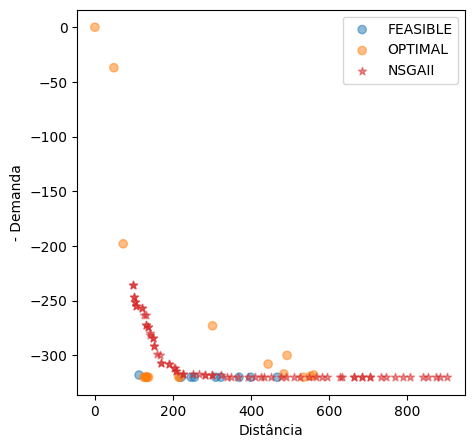

In [12]:
def plot_status_nsga(model_path=None, nsga_path=None, title='', figsize=(9, 9)):
    if model_path == None and nsga_path == None:
        raise Exception("Both paths are None")
        
    fig, ax = plt.subplots(figsize=figsize)
    color_list = mcolors.TABLEAU_COLORS
    
    plt.xlabel('Distância')
    plt.ylabel('- Demanda')
    plt.title(title)
    
    if model_path != None:
        df_model = clean_sol_csv_file(model_path)

        all_status = list(set(df_model.status))
        color_sequence = {i:color for i, color in enumerate(color_list)}

        color_map = {el:color_sequence[i] for i, el in enumerate(all_status)}

        for status in all_status:
            df_ = df_model[df_model.status == status]

            x = df_.dist
            y = -df_.demand
            colors = [color_map[status] for status in df_.status]

            ax.scatter(x, y, c=colors, alpha=0.5)
    
    if nsga_path != None:
        df_, params = read_out_file(nsga_path)
        
        ax.scatter(df_.dist, -df_.demand, c='tab:red', marker='*', alpha=0.5)
        ax.legend([*all_status, 'NSGAII'])
    
    return fig, ax

model_path = "../project/resultados/exp_20220927/A-n50-m4-Q80-v4-s100-d1_1_1_1_sol_20220927135621.csv"
nsga_path = "../project/src/cpp/A-n50-m4-Q80-v4-s100-d1_1_1_1-20221005103016.out"

fig, ax = plot_status_nsga(model_path, nsga_path, figsize=(5, 5))

In [ ]:
# for i in range(3):
#     plot_scatter(df, figsize=(4,4))
import os
import glob
import pygmo as pg

folderpath = "../project/resultados/exp_20220927"

inst_name_from_filepath = lambda filepath: os.path.basename(filepath).split('_sol')[0]

for filepath in glob.glob(f"{folderpath}/*_sol_*.csv"):
    if os.path.isfile(filepath):
        instance = inst_name_from_filepath(filepath)
        
        df = clean_sol_csv_file(filepath)
#         plot_scatter(df, figsize=(4,4), title=instance)
        
        plt_scatter_dom_not_dom(df, figsize=(4,4), title=instance)
        
#         pop = df[['dist', 'demand']].values*[1, -1]
        
#         ref_point = mo.ref_point(pop)
#         print(f"{instance}: {ref_point}")
#         print(mo.hypervolume(pop, ref_point))
        
#         hv = pg.hypervolume(pop)
        
#         print('*'*80)
#         contri = hv.contributions(ref_point)
#         for c in contri:
#             if c > 0:
#                 print(c)
        
#         print(f"{instance}: {mo.hypervolume(pop, ref_point)/ref_point[0]/ref_point[1]}")
        

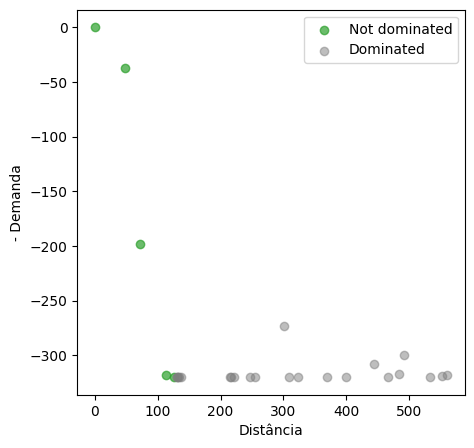

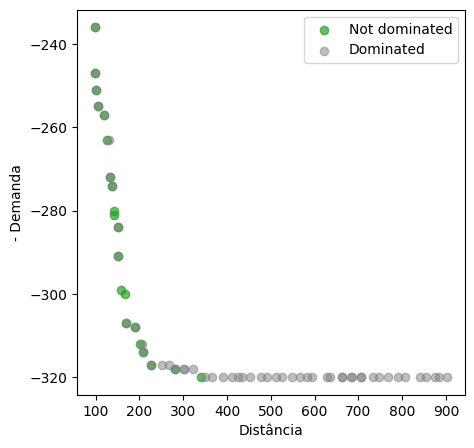

In [10]:
def plt_scatter_dom_not_dom(pop, title="", figsize=(9, 9)):
    no_dom_idx, dom_idx = mo.no_dominated(pop)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    plt.xlabel('Distância')
    plt.ylabel('- Demanda')
    plt.title(title)
    
    plt_idx = lambda idx, color, alpha: ax.scatter(pop[idx, 0], pop[idx, 1], c=color, alpha=alpha)
    
    plt_idx(no_dom_idx, 'tab:green', 0.7)
    plt_idx(dom_idx, 'tab:gray', 0.5)
    
    ax.legend(['Not dominated', 'Dominated'])
    return (fig, ax)

df_model = clean_sol_csv_file(model_path)
pop = df_model[['dist', 'demand']].values*[1, -1]
fig, ax = plt_scatter_dom_not_dom(pop, figsize=(5, 5))

df_, params = read_out_file(nsga_path)
pop = df_[['dist', 'demand']].values*[1, -1]

fig, ax = plt_scatter_dom_not_dom(pop, figsize=(5, 5))